<a href="https://colab.research.google.com/github/fadillarizalul/predictive-analytics/blob/main/predictive_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, confusion_matrix, precision_score, plot_roc_curve, auc

import warnings
warnings.filterwarnings('ignore')
sns.set()

# Importing Data

In [ ]:
# Import the Datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
# Preview dataset
train.head()

,employee_id,umur,jenis_kelamin,IPK,level,tahun_lulus,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,kecelakaan_kerja,promosi_5thn_lalu,tingkat_gaji,resign
0,10000,NaN,Laki-laki,1.947303,Junior,NaN,Sudah Menikah,management,210.0,0.82,0.419035,3,3 Years,belum pernah,belum,sedang,0
1,10001,NaN,Laki-laki,3.218346,Full-Time,NaN,Belum Menikah,sales,189.0,0.76,0.558254,3,24 Months,belum pernah,belum,rendah,0
2,10002,NaN,Laki-laki,2.117364,Senior,NaN,Sudah Menikah,management,NaN,0.81,0.580364,5,2 Years,pernah,belum,tinggi,0
3,10003,NaN,Laki-laki,3.178748,Full-Time,NaN,Belum Menikah,sales,121.0,0.84,0.446109,3,36 Months,pernah,belum,rendah,0
4,10004,34.0,Laki-laki,2.680535,Part-Time,2008.0,Belum Menikah,technical,229.0,0.48,NaN,3,3 Years,belum pernah,belum,rendah,0


## Initial Screening

In [ ]:
# Check the shape of train dataset
train.shape

(10049, 17)

In [ ]:
# Describe numeric columns
train.describe()

,employee_id,umur,IPK,tahun_lulus,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,resign
count,10049.000000,2338.000000,10049.000000,2338.000000,8700.000000,9253.000000,8499.000000,10049.000000,10049.000000
mean,15024.000000,33.499572,2.396161,2008.151839,202.981379,0.611906,0.455847,3.797691,0.238034
std,2901.040762,7.951891,0.868485,7.988843,56.708467,0.247945,0.113812,1.227331,0.425901
min,10000.000000,20.000000,0.003057,1986.000000,96.000000,0.090000,0.000000,2.000000,0.000000
25%,12512.000000,27.000000,1.778721,2003.000000,156.000000,0.440000,0.382326,3.000000,0.000000
50%,15024.000000,32.000000,2.523730,2009.000000,200.000000,0.640000,0.448720,4.000000,0.000000
75%,17536.000000,39.000000,3.091618,2015.000000,246.000000,0.810000,0.522630,5.000000,0.000000
max,20048.000000,55.000000,3.989568,2024.000000,559.000000,1.000000,1.000000,7.000000,1.000000


# Exploratory Data Analysis

## Variable Description

In [ ]:
# Column data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10049 entries, 0 to 10048
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employee_id                    10049 non-null  int64  
 1   umur                           2338 non-null   float64
 2   jenis_kelamin                  10049 non-null  object 
 3   IPK                            10049 non-null  float64
 4   level                          10049 non-null  object 
 5   tahun_lulus                    2338 non-null   float64
 6   status_perkawinan              10049 non-null  object 
 7   divisi                         10049 non-null  object 
 8   rerata_jam_bulanan             8700 non-null   float64
 9   tingkat_kepuasan_bekerja       9253 non-null   float64
 10  nilai_evaluasi_terakhir        8499 non-null   float64
 11  jumlah_proyek_yang_dikerjakan  10049 non-null  int64  
 12  lama_di_perusahaan             10049 non-null 

In [ ]:
# Check for duplicate values
train.duplicated().any()

False

In [ ]:
# Check column data types for test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4950 entries, 0 to 4949
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employee_id                    4950 non-null   int64  
 1   umur                           1070 non-null   float64
 2   jenis_kelamin                  4950 non-null   object 
 3   IPK                            4950 non-null   float64
 4   level                          4950 non-null   object 
 5   tahun_lulus                    1151 non-null   float64
 6   status_perkawinan              4950 non-null   object 
 7   divisi                         4950 non-null   object 
 8   rerata_jam_bulanan             4362 non-null   float64
 9   tingkat_kepuasan_bekerja       4484 non-null   float64
 10  nilai_evaluasi_terakhir        4094 non-null   float64
 11  jumlah_proyek_yang_dikerjakan  4950 non-null   int64  
 12  lama_di_perusahaan             4950 non-null   o

## Missing Values

In [ ]:
# Check missing values per column

train.isna().sum()

employee_id                         0
umur                             7711
jenis_kelamin                       0
IPK                                 0
level                               0
tahun_lulus                      7711
status_perkawinan                   0
divisi                              0
rerata_jam_bulanan               1349
tingkat_kepuasan_bekerja          796
nilai_evaluasi_terakhir          1550
jumlah_proyek_yang_dikerjakan       0
lama_di_perusahaan                  0
kecelakaan_kerja                    0
promosi_5thn_lalu                   0
tingkat_gaji                        0
resign                              0
dtype: int64

Text(0, 0.5, 'Percentage Missing')

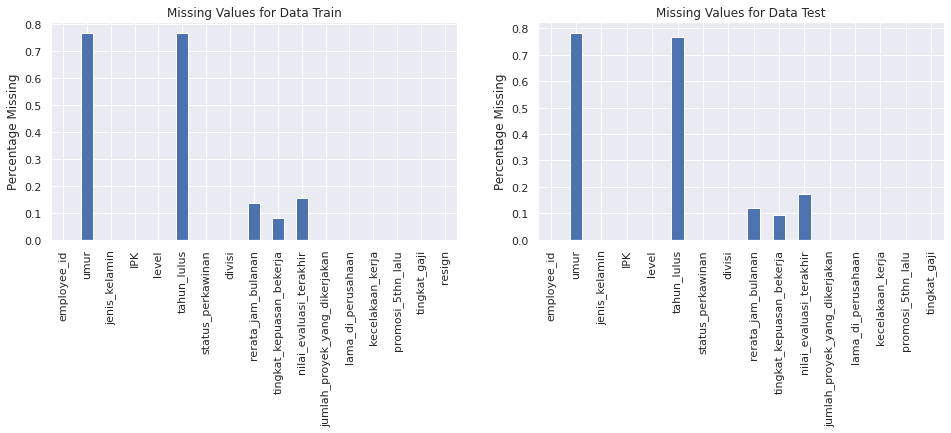

In [ ]:
# Missing Values Distribution
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

sns.color_palette("mako", as_cmap=True)
(train.isna().sum()/train.shape[0]).plot(kind='bar', ax=ax1)
ax1.set_title('Missing Values for Data Train')
ax1.set_ylabel('Percentage Missing')

(test.isna().sum()/test.shape[0]).plot(kind='bar', ax=ax2)
ax2.set_title('Missing Values for Data Test')
ax2.set_ylabel('Percentage Missing')

In [ ]:
# Mengatasi Missing Values
# untuk data Train
train['umur'].fillna(train['umur'].mean(), inplace=True)
train['tahun_lulus'].fillna(train['tahun_lulus'].mean(), inplace=True)
train['rerata_jam_bulanan'].fillna(train['rerata_jam_bulanan'].mean(), inplace=True)
train['tingkat_kepuasan_bekerja'].fillna(train['tingkat_kepuasan_bekerja'].mean(), inplace=True)
train['nilai_evaluasi_terakhir'].fillna(train['nilai_evaluasi_terakhir'].mean(), inplace=True)
# untuk data Test
test['umur'].fillna(train['umur'].mean(), inplace=True)
test['tahun_lulus'].fillna(train['tahun_lulus'].mean(), inplace=True)
test['rerata_jam_bulanan'].fillna(train['rerata_jam_bulanan'].mean(), inplace=True)
test['tingkat_kepuasan_bekerja'].fillna(train['tingkat_kepuasan_bekerja'].mean(), inplace=True)
test['nilai_evaluasi_terakhir'].fillna(train['nilai_evaluasi_terakhir'].mean(), inplace=True)

In [ ]:
train.isna().sum()

employee_id                      0
umur                             0
jenis_kelamin                    0
IPK                              0
level                            0
tahun_lulus                      0
status_perkawinan                0
divisi                           0
rerata_jam_bulanan               0
tingkat_kepuasan_bekerja         0
nilai_evaluasi_terakhir          0
jumlah_proyek_yang_dikerjakan    0
lama_di_perusahaan               0
kecelakaan_kerja                 0
promosi_5thn_lalu                0
tingkat_gaji                     0
resign                           0
dtype: int64

## Detect Outliers

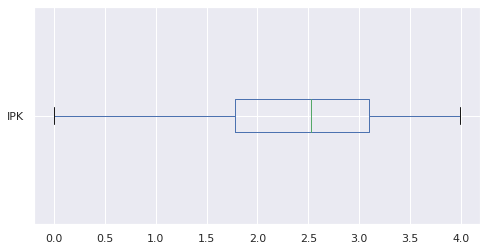

In [ ]:
# Box plot 'IPK'
plt.figure(figsize=(8,4))
train['IPK'].plot(kind='box', vert=False)

plt.show()

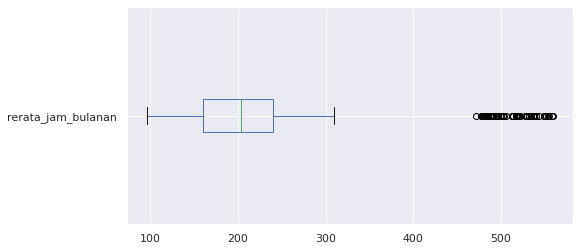

In [ ]:
# Box plot 'rerata_jam_bulanan'
plt.figure(figsize=(8,4))
train['rerata_jam_bulanan'].plot(kind='box', vert=False)

plt.show()

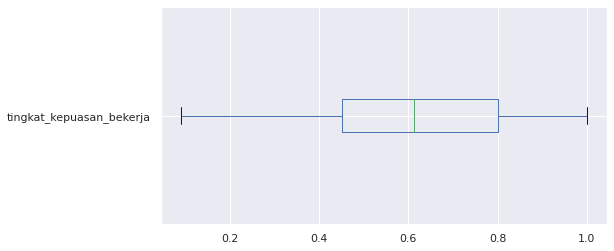

In [ ]:
# Box plot 'tingkat_kepuasan_bekerja'
plt.figure(figsize=(8,4))
train['tingkat_kepuasan_bekerja'].plot(kind='box', vert=False)

plt.show()

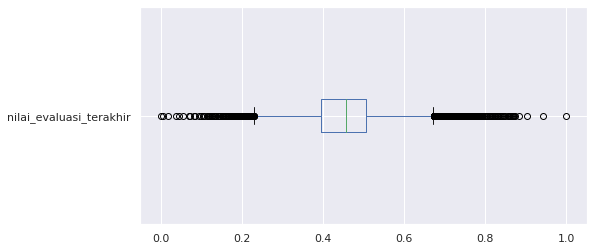

In [ ]:
# Box plot 'nilai_evaluasi_terakhir'
plt.figure(figsize=(8,4))
train['nilai_evaluasi_terakhir'].plot(kind='box', vert=False)

plt.show()

Terdeteksi Outliers pada fitur 'rerata_jam_bulanan' dan fitur 'nilai_evaluasi_terakhir'. Sehingga dilakukan metode IQR

In [ ]:
# Create function for Outlier
def remove_outlier(outlier_col):
    q1 = np.nanquantile(train[outlier_col], 0.25)
    q3 = np.nanquantile(train[outlier_col], 0.75)
    iqr = q3-q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier = train[(train[outlier_col] < lower) | (train[outlier_col] > upper)].index
    train.drop(index=outlier, inplace=True)

In [ ]:
# Call the remove_outlier function to remover features Outliers data

remove_outlier('rerata_jam_bulanan')
remove_outlier('nilai_evaluasi_terakhir')

In [ ]:
# Recheck dataset shape after removing Outliers
train.shape

(9490, 17)

In [ ]:
# Recheck dataset shape after removing Outliers

test.shape

(4950, 16)

## Univariate Analysis

In [ ]:
# Create Function of Encoding 'lama_di_perusahaan' from object to float
def lmpp(x):
    if type(x) != float:
        if 'Month' in x:
            a = int(x.split()[0]) / 12
        else:
            a = int(x.split()[0])
        return a
    else:
        return np.nan

# Encoding 'lama_di_perusahaan' from object to float
train['lama_di_perusahaan'] = train['lama_di_perusahaan'].apply(lambda x: lmpp(x))
test['lama_di_perusahaan'] = test['lama_di_perusahaan'].apply(lambda x: lmpp(x))

In [ ]:
# Preview train dataset after encoding a feature

train.head()

,employee_id,umur,jenis_kelamin,IPK,level,tahun_lulus,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,kecelakaan_kerja,promosi_5thn_lalu,tingkat_gaji,resign
0,10000,33.499572,Laki-laki,1.947303,Junior,2008.151839,Sudah Menikah,management,210.000000,0.82,0.419035,3,3.0,belum pernah,belum,sedang,0
1,10001,33.499572,Laki-laki,3.218346,Full-Time,2008.151839,Belum Menikah,sales,189.000000,0.76,0.558254,3,2.0,belum pernah,belum,rendah,0
2,10002,33.499572,Laki-laki,2.117364,Senior,2008.151839,Sudah Menikah,management,202.981379,0.81,0.580364,5,2.0,pernah,belum,tinggi,0
3,10003,33.499572,Laki-laki,3.178748,Full-Time,2008.151839,Belum Menikah,sales,121.000000,0.84,0.446109,3,3.0,pernah,belum,rendah,0
4,10004,34.000000,Laki-laki,2.680535,Part-Time,2008.000000,Belum Menikah,technical,229.000000,0.48,0.455847,3,3.0,belum pernah,belum,rendah,0


In [ ]:
# Check for train dataset info after encoding feature

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9490 entries, 0 to 10048
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employee_id                    9490 non-null   int64  
 1   umur                           9490 non-null   float64
 2   jenis_kelamin                  9490 non-null   object 
 3   IPK                            9490 non-null   float64
 4   level                          9490 non-null   object 
 5   tahun_lulus                    9490 non-null   float64
 6   status_perkawinan              9490 non-null   object 
 7   divisi                         9490 non-null   object 
 8   rerata_jam_bulanan             9490 non-null   float64
 9   tingkat_kepuasan_bekerja       9490 non-null   float64
 10  nilai_evaluasi_terakhir        9490 non-null   float64
 11  jumlah_proyek_yang_dikerjakan  9490 non-null   int64  
 12  lama_di_perusahaan             9490 non-null   

First, specify the dataset into categorical columns & numerical columns

In [ ]:
# Specify categorical columns & numerical columns
num_cols = ['umur', 'IPK', 'tahun_lulus', 'rerata_jam_bulanan', 'tingkat_kepuasan_bekerja', 
           'jumlah_proyek_yang_dikerjakan', 'nilai_evaluasi_terakhir', 'lama_di_perusahaan']
cat_cols = ['jenis_kelamin', 'level', 'status_perkawinan', 'divisi', 'kecelakaan_kerja',
          'promosi_5thn_lalu', 'tingkat_gaji']

Categorical Features

           jumlah sampel  persentase
Laki-laki           8201        86.4
Perempuan           1289        13.6


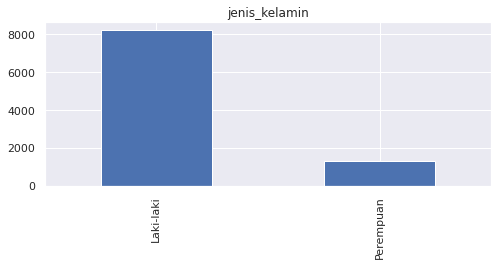

In [ ]:
# Distribution for 'jenis_kelamin' feature
feature = cat_cols[0]
count = train[feature].value_counts()
percent = 100*train[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, figsize=(8, 3));

            jumlah sampel  persentase
Full-Time            3297        34.7
Senior               1485        15.6
Part-Time            1412        14.9
Junior               1351        14.2
Probation             984        10.4
Internship            961        10.1


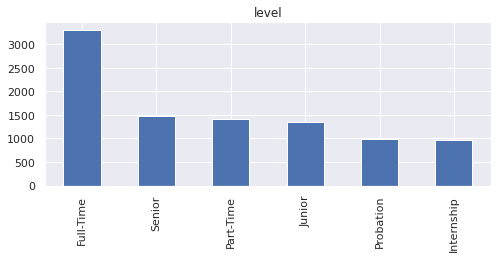

In [ ]:
# Distribution for 'level' feature
feature = cat_cols[1]
count = train[feature].value_counts()
percent = 100*train[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, figsize=(8, 3));

               jumlah sampel  persentase
Sudah Menikah           5815        61.3
Belum Menikah           3675        38.7


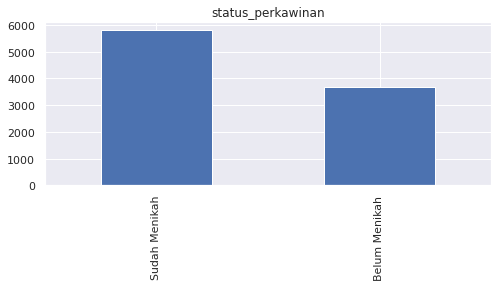

In [ ]:
# Distribution for 'status_perkawinan' feature
feature = cat_cols[2]
count = train[feature].value_counts()
percent = 100*train[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, figsize=(8, 3));

             jumlah sampel  persentase
sales                 2639        27.8
technical             1759        18.5
support               1380        14.5
IT                     759         8.0
product_mng            567         6.0
marketing              520         5.5
accounting             492         5.2
RandD                  491         5.2
hr                     475         5.0
management             408         4.3


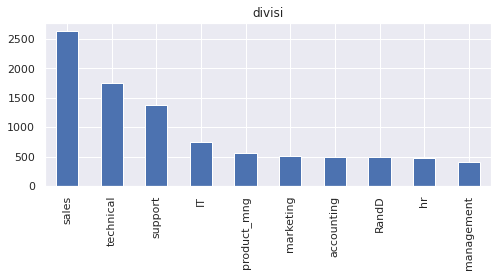

In [ ]:
# Distribution for 'divisi' feature
feature = cat_cols[3]
count = train[feature].value_counts()
percent = 100*train[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, figsize=(8, 3));

              jumlah sampel  persentase
belum pernah           8135        85.7
pernah                 1355        14.3


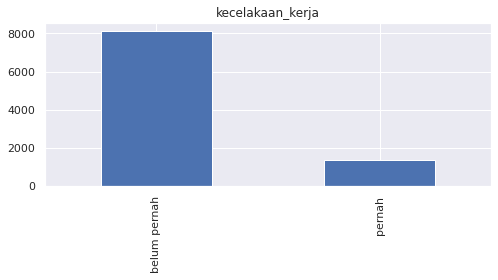

In [ ]:
# Distribution for 'kecelakaan_kerja' feature
feature = cat_cols[4]
count = train[feature].value_counts()
percent = 100*train[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, figsize=(8, 3));

       jumlah sampel  persentase
belum           9284        97.8
sudah            206         2.2


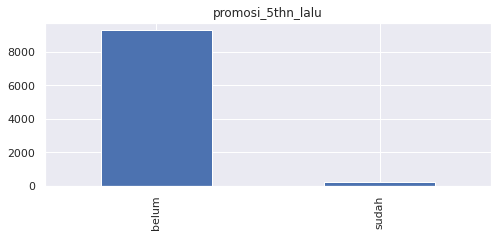

In [ ]:
# Distribution for 'promosi_5thn_lalu' feature
feature = cat_cols[5]
count = train[feature].value_counts()
percent = 100*train[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, figsize=(8, 3));

        jumlah sampel  persentase
rendah           4643        48.9
sedang           4072        42.9
tinggi            775         8.2


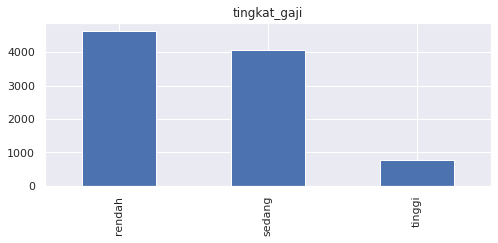

In [ ]:
# Distribution for 'tingkat_gaji' feature
feature = cat_cols[6]
count = train[feature].value_counts()
percent = 100*train[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, figsize=(8, 3));

Numeric Features

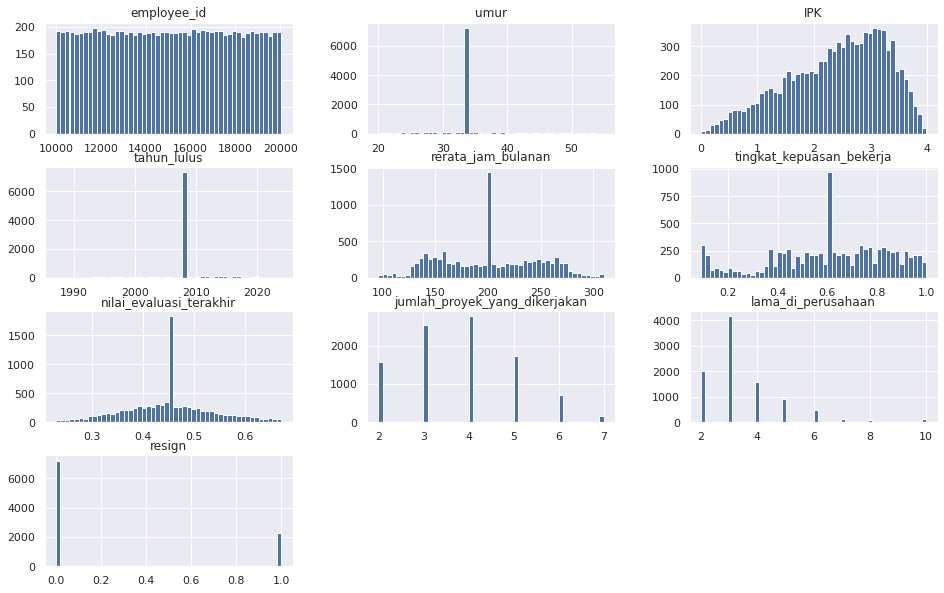

In [ ]:
# Distribution for numerical features by each features

import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(16,10))
plt.show()

## Multivariate Analysis

Categorical Features

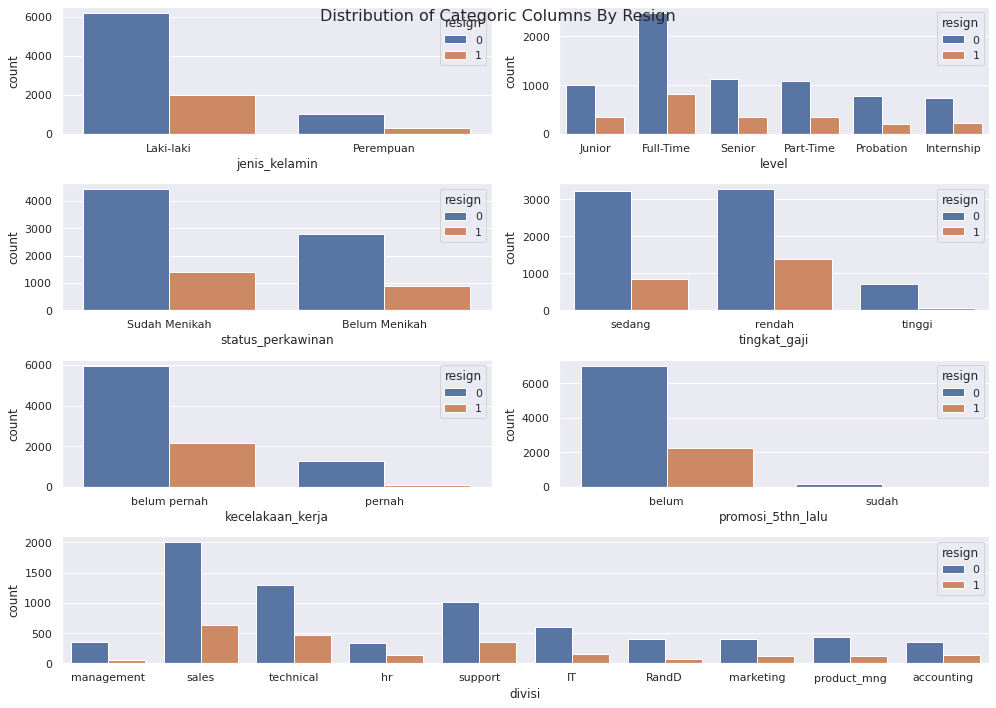

In [ ]:
# Distribution of Categorical Features By Label
fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6), (ax7,ax8)) = plt.subplots(4,2,figsize=(14,10))
ax7.remove()
ax8.remove()
ax7 = fig.add_subplot(414)

fig.suptitle('Distribution of Categoric Columns By Resign', fontsize=16)
      
sns.countplot(ax=ax1, x='jenis_kelamin', hue='resign', data=train)
sns.countplot(ax=ax2, x='level', hue='resign', data=train)
sns.countplot(ax=ax3, x='status_perkawinan', hue='resign', data=train)
sns.countplot(ax=ax4, x='tingkat_gaji', hue='resign', data=train)
sns.countplot(ax=ax5, x='kecelakaan_kerja', hue='resign', data=train)
sns.countplot(ax=ax6, x='promosi_5thn_lalu', hue='resign', data=train)
sns.countplot(ax=ax7, x='divisi', hue='resign', data=train)

fig.tight_layout()

Numeric Features

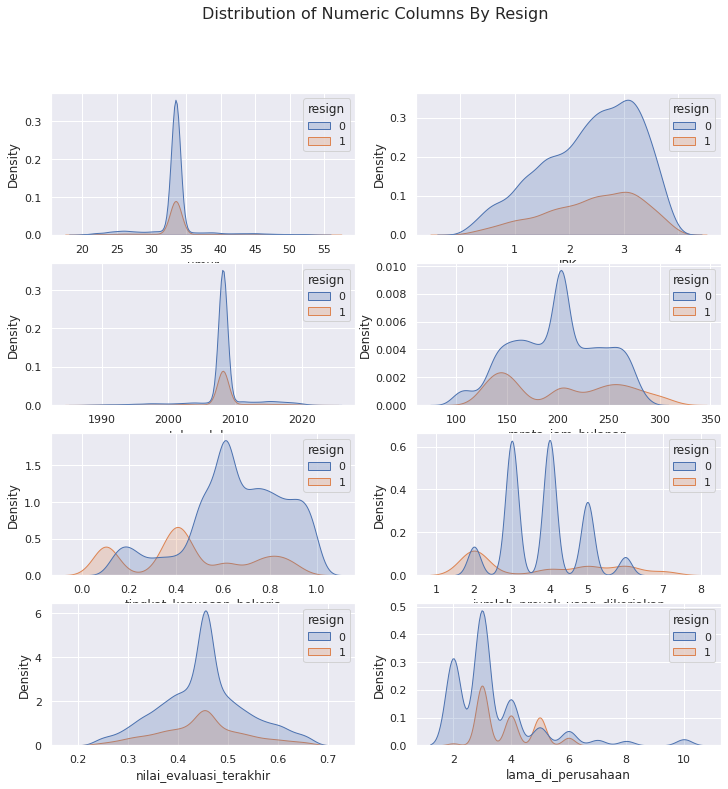

In [ ]:
# Distribution of Numeric Features By Label
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6), (ax7,ax8)) = plt.subplots(4, 2,figsize=(12,12))

fig.suptitle('Distribution of Numeric Columns By Resign', fontsize=16)

sns.kdeplot(ax=ax1, x='umur', hue='resign', data=train, shade=True)
sns.kdeplot(ax=ax2, x='IPK', hue='resign', data=train, shade=True)
sns.kdeplot(ax=ax3, x='tahun_lulus', hue='resign', data=train, shade=True)
sns.kdeplot(ax=ax4, x='rerata_jam_bulanan', hue='resign', data=train, shade=True)
sns.kdeplot(ax=ax5, x='tingkat_kepuasan_bekerja', hue='resign', data=train, shade=True)
sns.kdeplot(ax=ax6, x='jumlah_proyek_yang_dikerjakan', hue='resign', data=train, shade=True)
sns.kdeplot(ax=ax7, x='nilai_evaluasi_terakhir', hue='resign', data=train, shade=True)
sns.kdeplot(ax=ax8, x='lama_di_perusahaan', hue='resign', data=train, shade=True)

<Figure size 720x720 with 0 Axes>

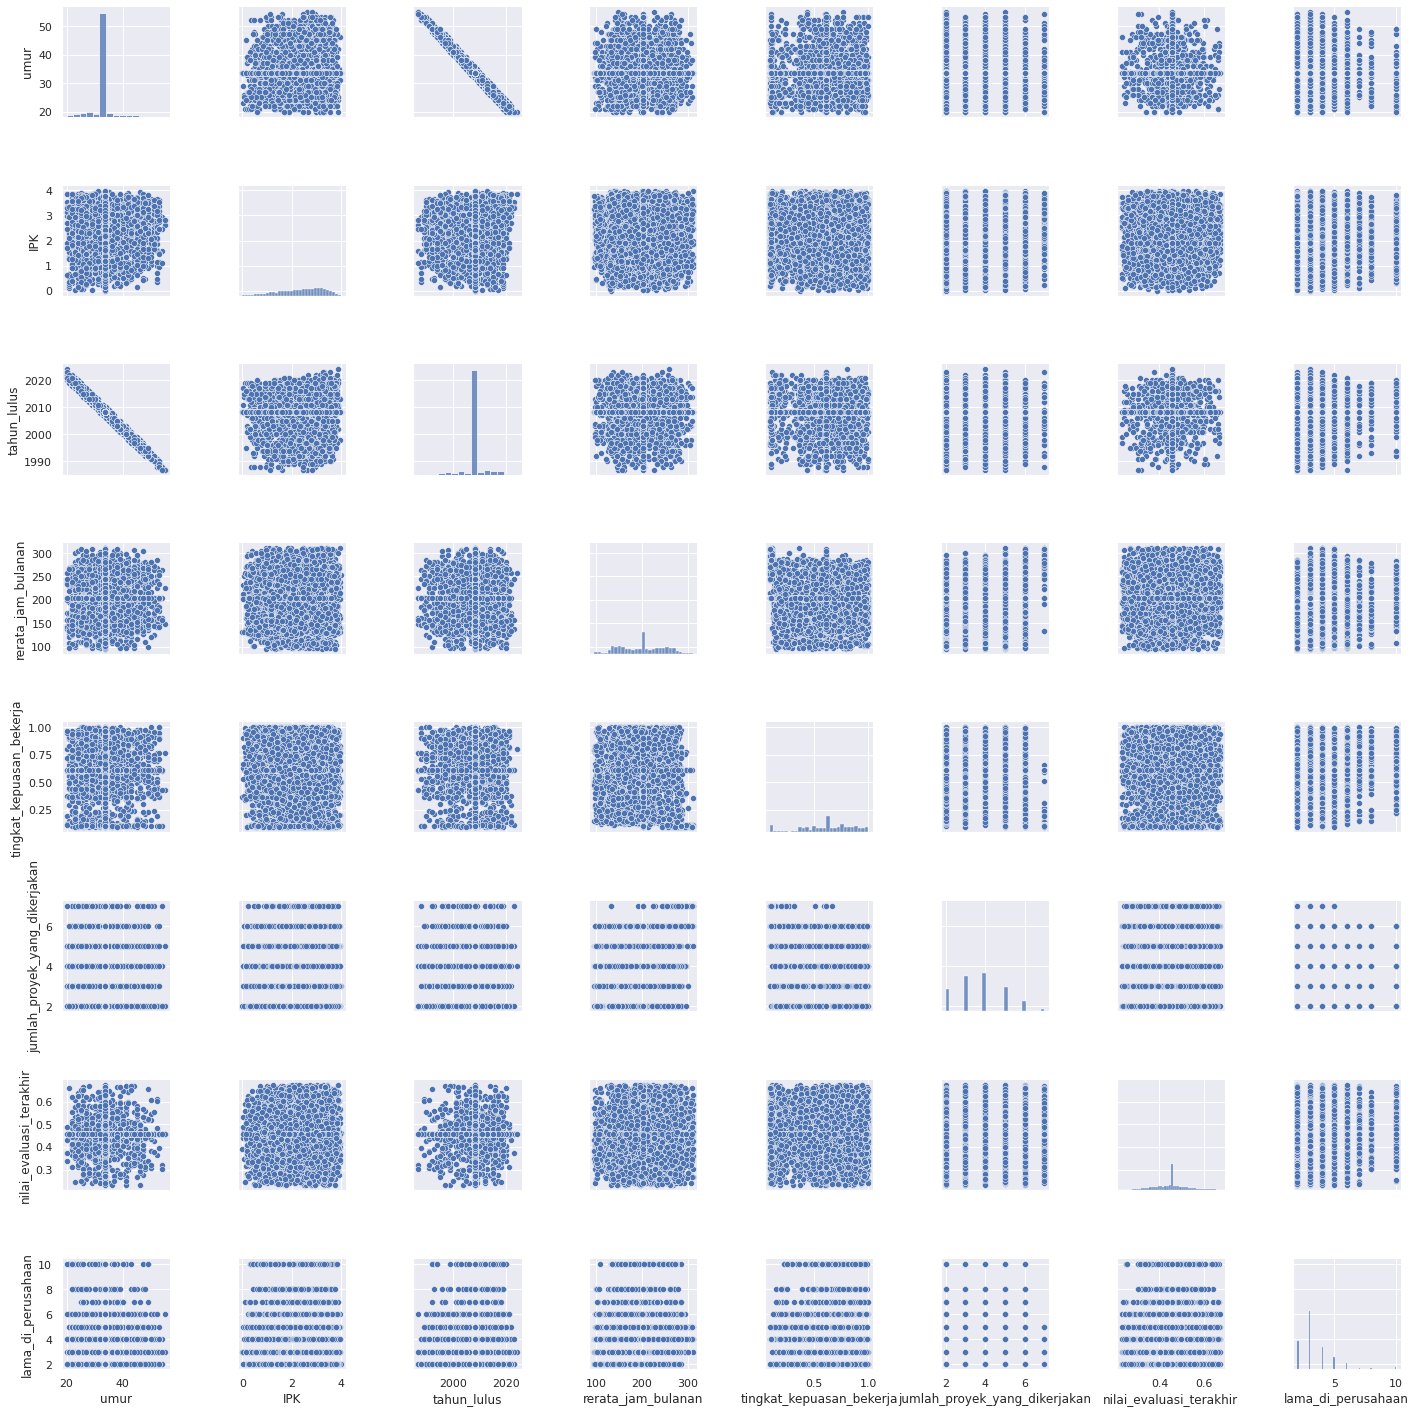

In [ ]:
# Pairplot distribution of Numerical features

f = plt.figure(figsize=(10,10))
sns.pairplot(train[num_cols])

Correlation Map

Text(0.5, 1.0, 'Heatmap')

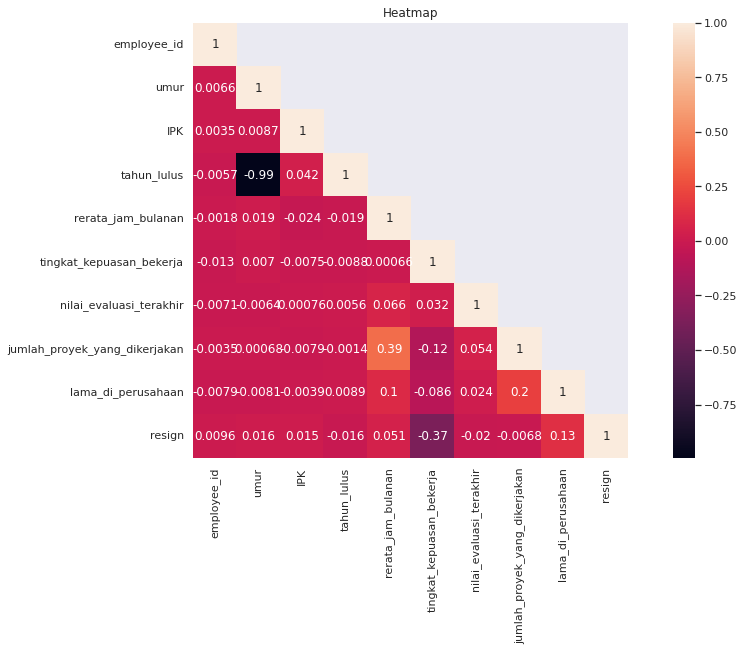

In [ ]:
# Plot Data Correlations of Numerical Features using Heatmap
fig, ax1 = plt.subplots(1, 1, figsize=(16,8))

mask = np.array(train.corr())
mask[np.tril_indices_from(mask)] = False


sns.heatmap(train.corr(), mask=mask, ax=ax1, annot=True, square=True)
ax1.set_title('Heatmap')

# Data Preparation

In [ ]:
# Drop the unuseful features

train = train.drop(columns=['employee_id','umur','tahun_lulus','IPK'])
test = test.drop(columns=['employee_id','umur','tahun_lulus','IPK'])

In [ ]:
# Preview dataset after drop some features

train.head()

,jenis_kelamin,level,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,kecelakaan_kerja,promosi_5thn_lalu,tingkat_gaji,resign
0,Laki-laki,Junior,Sudah Menikah,management,210.000000,0.82,0.419035,3,3.0,belum pernah,belum,sedang,0
1,Laki-laki,Full-Time,Belum Menikah,sales,189.000000,0.76,0.558254,3,2.0,belum pernah,belum,rendah,0
2,Laki-laki,Senior,Sudah Menikah,management,202.981379,0.81,0.580364,5,2.0,pernah,belum,tinggi,0
3,Laki-laki,Full-Time,Belum Menikah,sales,121.000000,0.84,0.446109,3,3.0,pernah,belum,rendah,0
4,Laki-laki,Part-Time,Belum Menikah,technical,229.000000,0.48,0.455847,3,3.0,belum pernah,belum,rendah,0


## Encoding categorical variables

In [ ]:
# Check dataset column types

train.dtypes

jenis_kelamin                     object
level                             object
status_perkawinan                 object
divisi                            object
rerata_jam_bulanan               float64
tingkat_kepuasan_bekerja         float64
nilai_evaluasi_terakhir          float64
jumlah_proyek_yang_dikerjakan      int64
lama_di_perusahaan               float64
kecelakaan_kerja                  object
promosi_5thn_lalu                 object
tingkat_gaji                      object
resign                             int64
dtype: object

In [ ]:
# Encode object-type columns
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [ ]:
# Preview dataset after encoding

train.head()

,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,resign,jenis_kelamin_Perempuan,level_Internship,level_Junior,level_Part-Time,level_Probation,level_Senior,status_perkawinan_Sudah Menikah,divisi_RandD,divisi_accounting,divisi_hr,divisi_management,divisi_marketing,divisi_product_mng,divisi_sales,divisi_support,divisi_technical,kecelakaan_kerja_pernah,promosi_5thn_lalu_sudah,tingkat_gaji_sedang,tingkat_gaji_tinggi
0,210.000000,0.82,0.419035,3,3.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,189.000000,0.76,0.558254,3,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,202.981379,0.81,0.580364,5,2.0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1
3,121.000000,0.84,0.446109,3,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,229.000000,0.48,0.455847,3,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# Modelling & Evaluation

In [ ]:
# Import required library for model & evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Splitting into train and validation set

train_x, val_x, train_y, val_y = train_test_split(train.drop(columns='resign'), train['resign'], test_size=0.2, random_state=69)

In [ ]:
# Preview dataset after split

train_x.head()

,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,jenis_kelamin_Perempuan,level_Internship,level_Junior,level_Part-Time,level_Probation,level_Senior,status_perkawinan_Sudah Menikah,divisi_RandD,divisi_accounting,divisi_hr,divisi_management,divisi_marketing,divisi_product_mng,divisi_sales,divisi_support,divisi_technical,kecelakaan_kerja_pernah,promosi_5thn_lalu_sudah,tingkat_gaji_sedang,tingkat_gaji_tinggi
3593,136.0,0.70,0.315341,6,3.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6768,169.0,0.23,0.368203,5,5.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8968,142.0,0.19,0.449774,4,6.0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3309,233.0,0.52,0.552626,4,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1748,194.0,0.32,0.461974,6,5.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Preview dataset after split

val_x.head()

,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,jenis_kelamin_Perempuan,level_Internship,level_Junior,level_Part-Time,level_Probation,level_Senior,status_perkawinan_Sudah Menikah,divisi_RandD,divisi_accounting,divisi_hr,divisi_management,divisi_marketing,divisi_product_mng,divisi_sales,divisi_support,divisi_technical,kecelakaan_kerja_pernah,promosi_5thn_lalu_sudah,tingkat_gaji_sedang,tingkat_gaji_tinggi
4526,238.0,0.94,0.326563,5,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6231,136.0,0.55,0.296009,4,3.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
350,147.0,0.43,0.455847,2,3.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5167,153.0,0.65,0.473971,4,2.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
648,196.0,0.16,0.455847,4,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Create metric evaluation and evaluate model using Logistic Regression

lg = LogisticRegression()
lg.fit(train_x, train_y)
pred = lg.predict(val_x)

print('Classification report model')
print(classification_report(val_y, pred, digits=5))

Classification report model
              precision    recall  f1-score   support

           0    0.83109   0.92696   0.87641      1465
           1    0.59470   0.36259   0.45050       433

    accuracy                        0.79821      1898
   macro avg    0.71289   0.64477   0.66346      1898
weighted avg    0.77716   0.79821   0.77925      1898



In [ ]:
# Create metric evaluation and evaluate model using Desicion Tree
dt = DecisionTreeClassifier(random_state=777)
dt.fit(train_x, train_y)
pred = dt.predict(val_x)

print('Classification report model')
print(classification_report(val_y, pred, digits=5))

Classification report model
              precision    recall  f1-score   support

           0    0.97603   0.97270   0.97436      1465
           1    0.90868   0.91917   0.91389       433

    accuracy                        0.96048      1898
   macro avg    0.94235   0.94593   0.94413      1898
weighted avg    0.96066   0.96048   0.96056      1898



In [ ]:
# Create metric evaluation and evaluate model using Random Forest

rf = RandomForestClassifier(random_state=0)
rf.fit(train_x, train_y)
pred = rf.predict(val_x)

print('Classification report model')
print(classification_report(val_y, pred, digits=5))

Classification report model
              precision    recall  f1-score   support

           0    0.97579   0.99044   0.98306      1465
           1    0.96594   0.91686   0.94076       433

    accuracy                        0.97366      1898
   macro avg    0.97086   0.95365   0.96191      1898
weighted avg    0.97354   0.97366   0.97341      1898



Consider three algorithm that already used above, also by using the metric evaluation that are **accuracy, precision, recall, and f1-score**, it is said that the best algorithm performed by **Random Forest**.

## Feature Importance

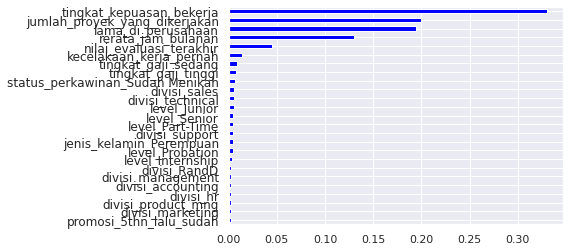

In [ ]:
# Check the Feature Importance using RandomForestClassifier

importances_rf = pd.Series(rf.feature_importances_, index=val_x.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', color='blue')
plt.rcParams["figure.figsize"] = (6,12)
plt.yticks(fontsize=12)
plt.show()